# Problem Statement:

A banking institution requires actionable insights from the perspective of Mortgage-Backed Securities, Geographic Business Investment and Real Estate Analysis. 

The objective is to identify white spaces/potential business in the mortgage loan. The mortgage bank would like to identify potential monthly mortgage expenses for each of region based on factors which are primarily monthly family income in a region and rented value of the real estate. Some of the regions are growing rapidly and Competitor banks are selling mortgage loans to subprime customers at a lower interest rate. The bank is strategizing for better market penetration and targeting new customers. A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies. This would help to monitor the key metrics and trends.


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 10)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

1.	Import data 

In [52]:
# 
from google.colab import files
# 
uploaded = files.upload()

In [53]:
df=pd.read_csv("train.csv")
df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [54]:
# Check dimensionality of your data frame using shape
# This data frame has 27,321 observations or rows and 80 variables or columns 
df.shape

(27321, 80)

In [55]:
# Check for duplicates
dups = df.duplicated(keep='first')
print(dups.value_counts())
print(dups[dups == True])

False    27161
True       160
dtype: int64
1623     True
1907     True
2447     True
4161     True
5066     True
         ... 
26769    True
26872    True
26910    True
27175    True
27176    True
Length: 160, dtype: bool


In [56]:
# There are 160 duplicate rows
# Keep first record of all duplicated rows
df.drop_duplicates(inplace=True)

In [57]:
# Recheck the dimensionality of the data
df.shape

(27161, 80)

    2.	Figure out the primary key and look for the requirement of indexing

In [58]:
# Check varialbes for unique values
df.nunique()

UID            27161
BLOCKID            0
SUMLEVEL           1
COUNTYID         296
STATEID           52
               ...  
pct_own        22302
married        20282
married_snp    10350
separated       6190
divorced       13688
Length: 80, dtype: int64

In [59]:
# After removing duplicate records, I can now use UID as my primary key for indexing
# set UID as my index
df.set_index('UID',inplace = True)
df.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [ ]:
df.info()

    3.	Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable. 

In [61]:
df.isnull().sum().sum()

42434

In [62]:
df.isnull().sum()

BLOCKID        27161
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          207
married          150
married_snp      150
separated        150
divorced         150
Length: 79, dtype: int64

In [63]:
# Drop fields
# drop BLOCKID since it has many nulls
# drop SUMLEVEL since it is populated with a constant for all rows
df.drop(columns=['BLOCKID', 'SUMLEVEL'], inplace = True)

In [64]:
df.isnull().sum()

COUNTYID         0
STATEID          0
state            0
state_ab         0
city             0
              ... 
pct_own        207
married        150
married_snp    150
separated      150
divorced       150
Length: 77, dtype: int64

In [65]:
# either replace numeric values with mean or drop records if small amount of missing values
df.dropna(inplace = True)
df.shape

(26585, 77)

In [66]:
df.isnull().sum().sum()

0

In [67]:
# 576 Records that contained NAs dropped. This accounts to 2.1% of the data. This is OK.

### Exploratory Analysis

  4.	Understanding homeowner costs are incredibly valuable because it is positively correlated to consumer spending which drives the economy through disposable income. Perform debt analysis. You may want to follow the following steps:
  (my note:we want to explore locations where debt is not too high because that would mean less consumer spending;less homeowner costs means more consumer spending)

*  (a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to roughly 50%.


In [68]:
df

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,tract,769,787,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
277856,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,tract,19422,215,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
233000,87,8,Colorado,CO,Weldona,Saddle Ridge,City,tract,80653,970,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712


In [69]:
df2 = df[['place','pct_own','second_mortgage','lat','lng']][(df['pct_own']>0.1)&(df['second_mortgage']<=0.5)]

In [70]:
df3_top_2500_locations=df2.sort_values(by='second_mortgage', ascending = False).head(2500)

In [71]:
df3_top_2500_locations

,place,pct_own,second_mortgage,lat,lng
UID,,,,,
289712,Farmville,0.62069,0.50000,37.297357,-78.396452
251185,Worcester City,0.20247,0.43363,42.254262,-71.800347
269323,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
251324,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
235788,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
...,...,...,...,...,...
230480,Manteca City,0.67116,0.06814,37.732143,-121.242902
236853,Cutler Bay,0.50519,0.06813,25.550391,-80.347791
287458,Keller City,0.97987,0.06812,32.913822,-97.204310


In [72]:
import plotly.graph_objects as go

In [73]:
#export for Tableau geo map
df3_top_2500_locations.to_excel("df3_top_2500_locations.xlsx",sheet_name='top_2500')  

In [74]:
fig = go.Figure(data = go.Scattergeo(lat=df3_top_2500_locations['lat'], lon=df3_top_2500_locations['lng'], text=df3_top_2500_locations['place']), 
                layout = dict(title = 'Top 2,500 locations with the highest second mortgages', geo = dict(scope = 'usa')))


In [75]:
fig

*  4 (b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) 
*    Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

In [76]:
# home_equity_second_mortgage-percent of houses with a second mortgage and home equity loan
# in order to not overcount this intersection needs to be subtracted from (second_mortgage + home_equity)
df['bad_debt']=df['second_mortgage'] + df['home_equity'] - df['home_equity_second_mortgage']
df['good_debt']=df['debt']-df['bad_debt']
df['remaining_income']=df['family_mean']-df['hi_mean']

* 4 (c) Create pie charts to show overall debt and bad debt

In [77]:
df_pie = [df['good_debt'].sum(),df['bad_debt'].sum()]
df_pie

[13949.61679, 2796.55566]

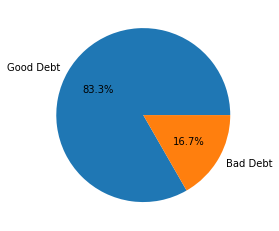

In [78]:
plt.pie(df_pie , labels = ['Good Debt', 'Bad Debt'], autopct='%0.1f%%');

*  4 (d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [79]:
import random

In [80]:
#Find the top 5 most occuring records by city
df['city'].value_counts().head(5)

Chicago         286
Brooklyn        261
Los Angeles     219
Houston         213
Philadelphia    160
Name: city, dtype: int64

In [81]:
#all_cities = [df['city'].unique()]
#run below once
#print(np.random.choice(all_cities[0], size=5, replace=False))

In [82]:
cities = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston' ,'Philadelphia']


In [83]:
df_cities = df.loc[df['city'].isin(cities)]
df_cities

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,good_debt,remaining_income
UID,,,,,,,,,,,,,,,,,,,,,
225738,37,6,California,CA,Los Angeles,View Park-windsor Hills,City,tract,90019,323,...,703.54749,2699.0,0.02972,0.36015,0.10843,0.06368,0.05077,0.00000,0.57377,1349.14396
267431,47,36,New York,NY,Brooklyn,New York City,City,tract,11218,718,...,454.27183,1806.0,0.29696,0.55029,0.06051,0.00491,0.04742,0.06220,0.58852,3208.84095
278415,101,42,Pennsylvania,PA,Philadelphia,Cornwells Heights,Borough,tract,19114,215,...,468.61138,2165.0,0.48917,0.50419,0.01916,0.01557,0.03713,0.03699,0.57110,11437.27727
242859,31,17,Illinois,IL,Chicago,Chicago City,Village,tract,60636,773,...,186.44001,799.0,0.60152,0.16021,0.05634,0.03697,0.09155,0.15547,0.22268,12074.72043
242616,31,17,Illinois,IL,Chicago,Cicero,Village,tract,60623,773,...,484.58017,2039.0,0.27222,0.25113,0.07706,0.05893,0.17135,0.03571,0.52858,5749.86283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242329,31,17,Illinois,IL,Chicago,Lincolnwood,Village,tract,60618,773,...,128.91435,648.0,0.53301,0.45719,0.00000,0.00000,0.01988,0.07018,0.70175,27950.70890
225853,37,6,California,CA,Los Angeles,Florence-graham,City,tract,90003,323,...,413.86758,1583.0,0.37744,0.37553,0.10950,0.02652,0.02908,0.13393,0.70982,421.69263
267041,47,36,New York,NY,Brooklyn,New York City,City,tract,11209,718,...,242.36784,987.0,0.51602,0.52200,0.03642,0.00000,0.05311,0.04000,0.55250,12253.75085


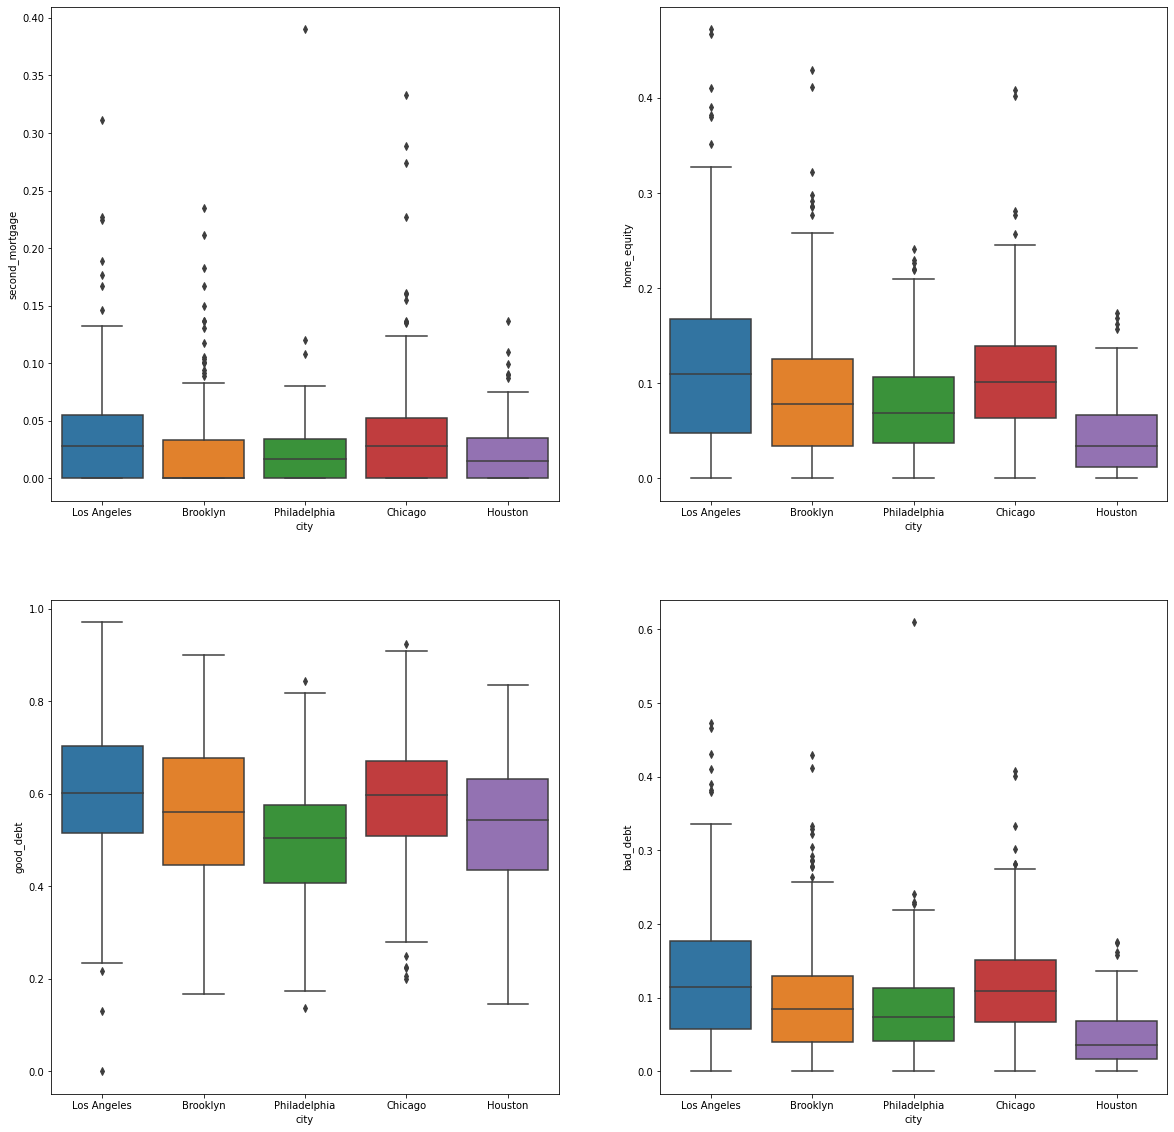

In [84]:
import seaborn as sns
fig , axes = plt.subplots(ncols=2,nrows=2, figsize=(20, 20))
sns.boxplot(y='second_mortgage', x='city', data=df_cities, ax=axes[0,0])
sns.boxplot(y='home_equity', x='city', data=df_cities, ax=axes[0,1])
sns.boxplot(y='good_debt', x='city', data=df_cities, ax=axes[1,0])
sns.boxplot(y='bad_debt', x='city', data=df_cities, ax=axes[1,1])

### Findings from boxplots:
Los Angeles and Chicago have the highest median perentage of second mortgages from the selected cities.LA also has the highest median of percentage of households with home equity loans. LA and Chicago lead in good debt and bad debt.

e) Create a collated income distribution chart for family income, house hold income, and remaining income

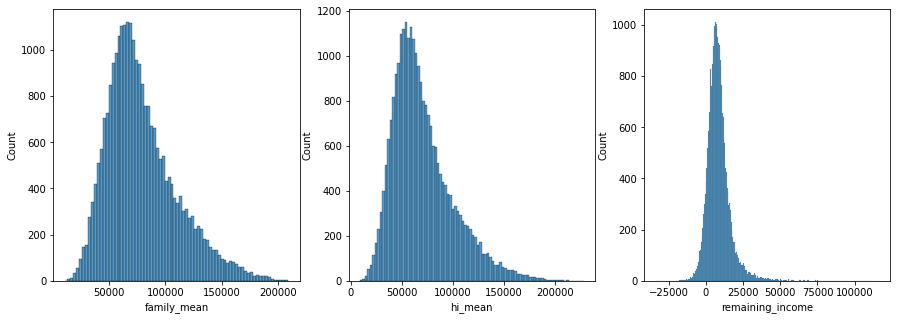

In [85]:
fig, axes=plt.subplots(ncols=3, nrows=1, figsize=(15,5))
# family income - Multiple incomes under one family.
sns.histplot(x=df['family_mean'], ax=axes[0])
# household income - all income under one address
sns.histplot(x=df['hi_mean'], ax=axes[1])
# remaining_income = family_mean - hi_mean
sns.histplot(x=df['remaining_income'], ax=axes[2])

Family mean income is mostly distributed between 30K-100K. 
Household income is mostly distributed between 25k-125K.

1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

a) Use pop and ALand variables to create a new field called population density

b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

In [34]:
df['population_density']=df['pop']/df['ALand']

In [35]:
df['median_age'] = ((df['male_pop']*df['male_age_median'])+(df['female_pop']*df['female_age_median']))\
/(df['male_pop']+df['female_pop'])

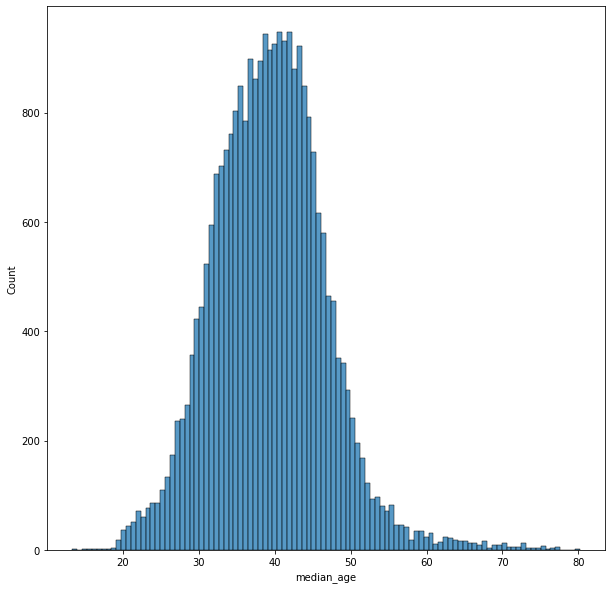

In [36]:
fig, axes=plt.subplots(ncols=1, nrows=1, figsize=(10,10))
sns.histplot(x=df['median_age'])

Median age distribution mostly between 30-50 years.

2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

  a) Analyze the married, separated, and divorced population for these population brackets

  b) Visualize using appropriate chart type

In [37]:
df['pop'].describe()

count    26585.000000
mean      4367.763438
std       2093.787018
min         63.000000
25%       2938.000000
50%       4078.000000
75%       5456.000000
max      53812.000000
Name: pop, dtype: float64

In [38]:
#figuring out cut
53812/3

17937.333333333332

In [39]:
# create a new column for population band
df['pop_bins']=pd.cut(df['pop'],bins=[0,18000,36000,54000])
df['pop_bins']

UID
267822    (0, 18000]
246444    (0, 18000]
245683    (0, 18000]
279653    (0, 18000]
247218    (0, 18000]
             ...    
279212    (0, 18000]
277856    (0, 18000]
233000    (0, 18000]
287425    (0, 18000]
265371    (0, 18000]
Name: pop_bins, Length: 26585, dtype: category
Categories (3, interval[int64, right]): [(0, 18000] < (18000, 36000] < (36000, 54000]]

In [40]:
chart = df.groupby(by ='pop_bins')[['married','separated','divorced']].mean()
chart

,married,separated,divorced
pop_bins,,,
"(0, 18000]",0.512476,0.018989,0.100838
"(18000, 36000]",0.640555,0.010473,0.065222
"(36000, 54000]",0.782710,0.004785,0.046705


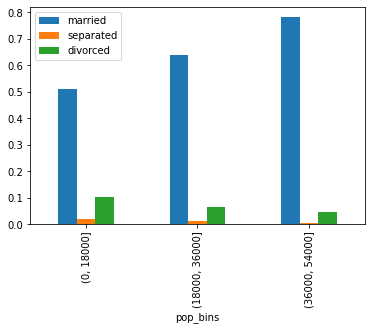

In [41]:
chart.plot(kind='bar')

This chart show me the percentages of marriage status by population bins. For example in each of the population categories, married makes up most of the proportion of the populations compared to separated and divorced.

3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.



In [42]:
#rent mean must be a monthly mean so multiply by 12 to get a full year's worth for calculating rent as a percentage of income
df['rent_mean'].mean()

1054.36884464322

In [43]:
# Overall percentage of income

(df['rent_mean'].sum()*12)/df['family_mean'].sum()*100

15.958713541437888

The overall rent spent as a percentage of family income is 16%

In [44]:

# View this percentage by state
rent_percentage_by_state = ((df.groupby(by ='state')['rent_mean'].sum()*12)/(df.groupby(by ='state')['family_mean'].sum()))*100
rent_percentage_by_state.sort_values(ascending = False).head(5)

state
Hawaii         20.935087
California     20.073129
Florida        18.954422
Puerto Rico    18.436555
Nevada         18.268563
dtype: float64

The top 5 states that have the highest perentage of rent to family income are:
Hawaii, California, Florida, Puerto Rico, and Nevada

In [45]:
rent_percentage_by_state.sort_values().head(5)

state
North Dakota     11.030834
South Dakota     11.030880
Iowa             11.913074
West Virginia    12.408627
Montana          12.724919
dtype: float64

The top 5 states with the lowest rent to family income ratio are:
North Dakota, South Dakota, Iowa, West Virginia, and Montana

4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [49]:
correlation_df = df[['family_mean', 'married', 'divorced', 'home_equity', 'hs_degree','median_age', 'second_mortgage', 'pct_own', 'bad_debt']]
a = correlation_df.corr()

In [50]:
a.to_excel("correlation.xlsx",sheet_name='correlation')

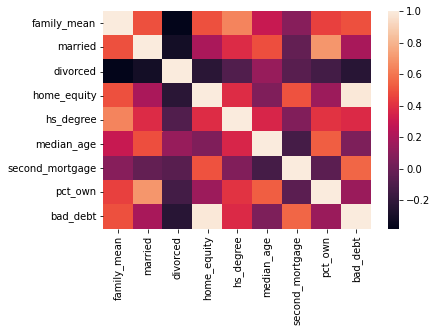

In [145]:
sns.heatmap(a)

### Findings from correlation heatmap:
Family mean income is positively correlated to percentage of people with at least a high school degree. Married people is positively correlated to percentage of home ownership.

In [51]:
df.to_excel("df.xlsx",sheet_name='df')

Data Pre-processing:

1. The economic multivariate data has a significant number of measured variables. **The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables.** 
2. Each variable is assumed to be dependent upon a linear combination of the common factors, and **the coefficients are known as loadings**. Each measured variable also includes a component due to independent random variability, known as **“specific variance”** because it is specific to one variable. **Obtain the common factors and then plot the loadings.** **Use factor analysis** to find latent variables in our dataset and gain insight into the linear relationships in the data. Following are the list of latent variables:

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

In [56]:
# save the latent variables for factor analysis into a new dataframe
print(list(df.columns))

['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight

In [133]:
df_fa = df[['family_mean', 'married', 'divorced', 'home_equity', 'hs_degree','median_age', 'second_mortgage', 'pct_own', 'bad_debt' ]]

In [ ]:
df_fa

In [ ]:
df_fa.isnull().sum().sum()

In [135]:
#Standardize the features- mean 0, std 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_fa = scaler.fit_transform(df_fa)

In [136]:
scaled_df_fa

array([[-0.36267632,  0.5043254 , -0.27477163, ..., -0.29696034,
         0.65732321, -0.16413614],
       [-0.91928223, -1.25295184, -0.22025652, ..., -0.24967349,
        -0.58124857, -0.9224153 ],
       [ 0.51343167,  1.03185291,  0.12088226, ..., -0.97430375,
         0.95037834, -0.1487756 ],
       ...,
       [ 0.30832131,  1.46847489, -0.49660619, ..., -0.3142445 ,
         0.6322375 , -0.39321502],
       [ 2.82307432,  1.85505293, -1.01051593, ...,  1.48787376,
         1.3531951 ,  0.55913871],
       [-0.78382676, -1.28815095,  0.67924277, ..., -0.51382763,
        -1.72693796,  1.15834763]])

In [137]:
# Attempting to reduce 10 features down to 3 using factor analysis
from sklearn.decomposition import FactorAnalysis 
#fa = FactorAnalysis(n_components = 3, rotation = 'varimax', max_iter = 500)
# modified by increasing factors to 4 to achieve a better R2 score
fa = FactorAnalysis(n_components = 4, rotation = 'varimax', max_iter = 500)
X_transformed = fa.fit_transform(scaled_df_fa)
pd.DataFrame(X_transformed)

,0,1,2,3
0,-0.162830,-0.699993,0.011630,0.317488
1,-0.871887,0.920148,-0.018465,0.035346
2,-0.283770,-0.910526,0.072539,-0.484995
3,-1.413641,-0.225836,0.403891,-0.070381
4,-0.744330,2.977918,-0.979583,-0.670235
...,...,...,...,...
26580,-1.261406,0.829472,0.821332,1.270334
26581,1.377884,-0.212914,-0.770488,-0.686699
26582,-0.535074,-1.130520,-0.406465,-0.187444
26583,0.114679,-1.244574,-1.002379,-1.838606


In [138]:
#loadings = pd.DataFrame(fa.components_, index = ["Factor1", "Factor2", "Factor3"], columns = df_fa.columns).T
loadings = pd.DataFrame(fa.components_, index = ["Factor1", "Factor2", "Factor3", "Factor4"], columns = df_fa.columns).T
loadings

,Factor1,Factor2,Factor3,Factor4
family_mean,0.343160,-0.328803,-0.255385,-0.734965
married,0.092777,-0.829570,-0.226661,-0.182576
divorced,-0.150213,0.106977,0.798705,0.124254
home_equity,0.965170,-0.073556,-0.069616,-0.172150
hs_degree,0.266267,-0.309319,0.079964,-0.645149
median_age,0.004794,-0.621801,0.292550,-0.225554
second_mortgage,0.590644,0.088543,-0.019514,0.124160
pct_own,0.061857,-0.782130,-0.015357,-0.233596
bad_debt,0.982388,-0.065746,-0.073353,-0.156953


Factor Analysis helps us find the latent variables
-  Factor1: (home_equity, second_mortgage, bad debt) They are all related and we can think of this factor as being **Bad Payers**.
-  Factor2:(married, median_age, pct_own) **Owners**
-  Factor3: **Divorced**
-  Factor4:(family_mean, hs_degree). **Income/Education**

- positive coefficient: independent variable increases -> the mean of the dependent variable increases. 
- negative coefficient: independent variable increases -> the dependent variable decreases.

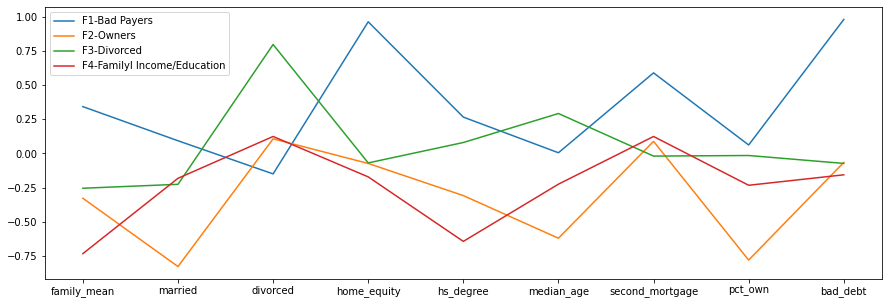

In [139]:
plt.figure(figsize =(15,5))
plt.plot(loadings)
plt.legend(['F1-Bad Payers', 'F2-Owners', 'F3-Divorced', 'F4-Familyl Income/Education'])

In [140]:
# Prepare the dataframe for model
# Convert array to a dataframe
factors_df = pd.DataFrame(X_transformed)
# Target
label = pd.DataFrame(df.hc_mortgage_mean)
label.reset_index(inplace = True, drop = True)
#combine into one dataframe
final_df = pd.concat([factors_df, label], axis = 1)
final_df

,0,1,2,3,hc_mortgage_mean
0,-0.162830,-0.699993,0.011630,0.317488,1414.80295
1,-0.871887,0.920148,-0.018465,0.035346,864.41390
2,-0.283770,-0.910526,0.072539,-0.484995,1506.06758
3,-1.413641,-0.225836,0.403891,-0.070381,1175.28642
4,-0.744330,2.977918,-0.979583,-0.670235,1192.58759
...,...,...,...,...,...
26580,-1.261406,0.829472,0.821332,1.270334,770.11560
26581,1.377884,-0.212914,-0.770488,-0.686699,2210.84055
26582,-0.535074,-1.130520,-0.406465,-0.187444,1671.07908
26583,0.114679,-1.244574,-1.002379,-1.838606,3074.83088


# Data Modeling :
1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

-  a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

  b) Run another model at State level. There are 52 states in USA.

  c) Keep below considerations while building a linear regression model.
> Data Modeling:
> -  variables should have significant impact on predicting Monthly mortgage and owner costs
> - Utilize all predictor variable to start with initial hypothesis
> - R square of 60 percent and above should be achieved
> - Ensure Multi-collinearity does not exist in dependent variables
> - Test if predicted variable is normally distributed

In [141]:
# Check there are no missing values for the target variable
final_df['hc_mortgage_mean'].isnull().sum().sum()

0

In [142]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = final_df.drop(columns = 'hc_mortgage_mean')
y = final_df.hc_mortgage_mean # this is a series
lm.fit(X,y)
y_predict = lm.predict(X)

In [143]:
round(lm.score(X,y)*100,1)

62.7

Success. I was able to come up with a model whose R squared score is above 60%.

In [130]:
y_predict

array([1437.62833112, 1434.39965199, 1730.47816887, ..., 1656.24909908,
       2647.84624218, 1662.91339785])

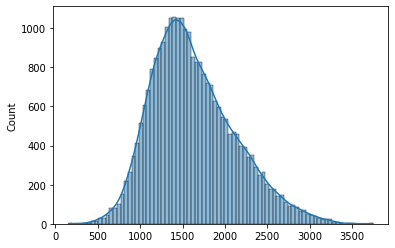

In [131]:
#Test if predicted variable is normally distributed
sns.histplot(y_predict, kde = True)

The plot has a bell shaped curve and so is normally distributed.

In [ ]:
# left off at ~ 1:21:00
# Next part is to create the Tableau dashboard.
# make some more remarks here for all of your charts that are missing findings